# 애플,아마존,구글,마이크로소프트 데이터 분석


* 개요
1. 주식가격의 변화
1. 하루 평균 수익률
1. 여러 종목의 이동평균
1. 종목간의 상관관계
1. 주식 투자에 따른 위험 
1. 과거의 데이터를 통한 미래의 주가 예측

# 주식가격의 변화

In [1]:
# !pip install yfinance
# !pip install pandas_datareader --upgrade

# !pip install pycryptodome pycryptodomex
# !pip uninstall --yes pandas-datareader
# !pip install git+https://github.com/raphi6/pandas-datareader.git@ea66d6b981554f9d0262038aef2106dda7138316

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-12-16,88.269997,89.349998,86.730003,87.860001,87.860001,146044000,AMAZON
2022-12-19,87.510002,87.629997,84.510002,84.919998,84.919998,83531500,AMAZON
2022-12-20,85.330002,86.610001,84.330002,85.190002,85.190002,74348300,AMAZON
2022-12-21,86.180000,87.230003,85.209999,86.769997,86.769997,59267200,AMAZON
2022-12-22,85.519997,85.680000,82.250000,83.790001,83.790001,81431300,AMAZON
2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700,AMAZON
2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000,AMAZON
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600,AMAZON
2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54995900,AMAZON


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.959747,104487900,APPLE
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.663086,99310400,APPLE
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.910645,94537600,APPLE
2022-01-06,172.699997,175.300003,171.639999,172.000000,171.007523,96904000,APPLE
2022-01-07,172.889999,174.139999,171.029999,172.169998,171.176514,86709100,APPLE


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700,AMAZON
2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000,AMAZON
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600,AMAZON
2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54995900,AMAZON
2022-12-30,83.120003,84.050003,82.470001,84.000000,84.000000,62330000,AMAZON


In [5]:
df[df['company_name'] == 'GOOGLE']

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-01-03,144.475494,145.550003,143.502502,145.074493,145.074493,25214000,GOOGLE
2022-01-04,145.550507,146.610001,143.816147,144.416504,144.416504,22928000,GOOGLE
2022-01-05,144.181000,144.298004,137.523499,137.653503,137.653503,49642000,GOOGLE
2022-01-06,137.497498,139.686005,136.763504,137.550995,137.550995,29050000,GOOGLE
2022-01-07,137.904999,138.254745,135.789001,137.004501,137.004501,19408000,GOOGLE
...,...,...,...,...,...,...,...
2022-12-23,87.620003,90.099998,87.620003,89.809998,89.809998,17815000,GOOGLE
2022-12-27,89.309998,89.500000,87.535004,87.930000,87.930000,15470900,GOOGLE
2022-12-28,87.500000,88.519997,86.370003,86.459999,86.459999,17879600,GOOGLE


In [6]:
df[df['company_name'] == 'MICROSOFT']

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-01-03,335.350006,338.000000,329.779999,334.750000,331.642426,28865100,MICROSOFT
2022-01-04,334.829987,335.200012,326.119995,329.010010,325.955780,32674300,MICROSOFT
2022-01-05,325.859985,326.070007,315.980011,316.380005,313.443024,40054300,MICROSOFT
2022-01-06,313.149994,318.700012,311.489990,313.880005,310.966187,39646100,MICROSOFT
2022-01-07,314.149994,316.500000,310.089996,314.040009,311.124695,32720000,MICROSOFT
...,...,...,...,...,...,...,...
2022-12-23,236.110001,238.869995,233.940002,238.729996,238.729996,21207000,MICROSOFT
2022-12-27,238.699997,238.929993,235.830002,236.960007,236.960007,16688600,MICROSOFT
2022-12-28,236.889999,239.720001,234.169998,234.529999,234.529999,17457100,MICROSOFT


In [7]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,154.802709,156.907809,152.691315,154.835060,154.381919,8.791008e+07
std,13.063034,12.937389,13.108058,13.056081,12.845560,2.365712e+07
min,127.989998,129.949997,125.870003,126.040001,126.040001,3.519590e+07
25%,144.330002,146.709999,142.324997,144.645004,144.459732,7.229740e+07
50%,154.009995,155.830002,151.940002,154.089996,153.621414,8.373720e+07
75%,166.189995,167.989998,164.044998,165.915001,165.271561,9.693705e+07
max,182.630005,182.940002,179.119995,182.009995,180.959747,1.826020e+08


In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-01-03 to 2022-12-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


## EDA

### 종가

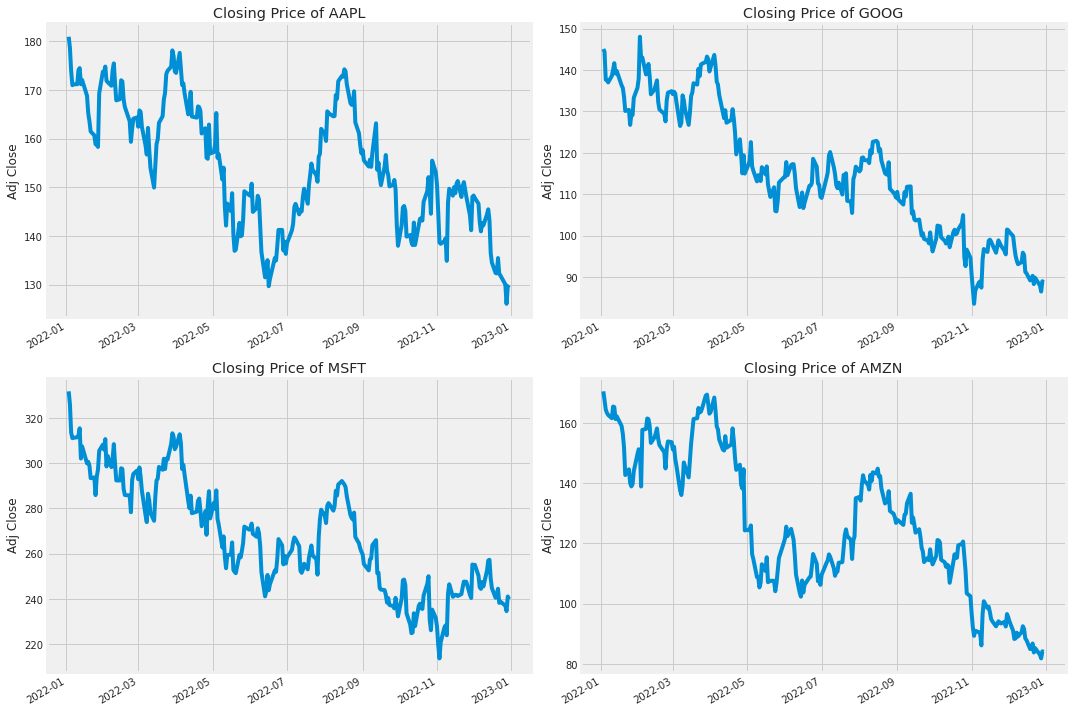

In [9]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()


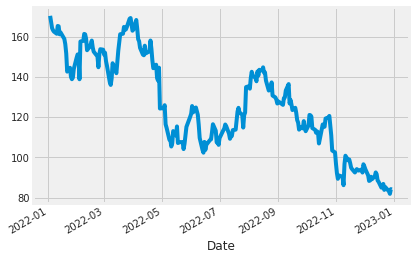

In [10]:
company['Close'].plot()

### 거래량

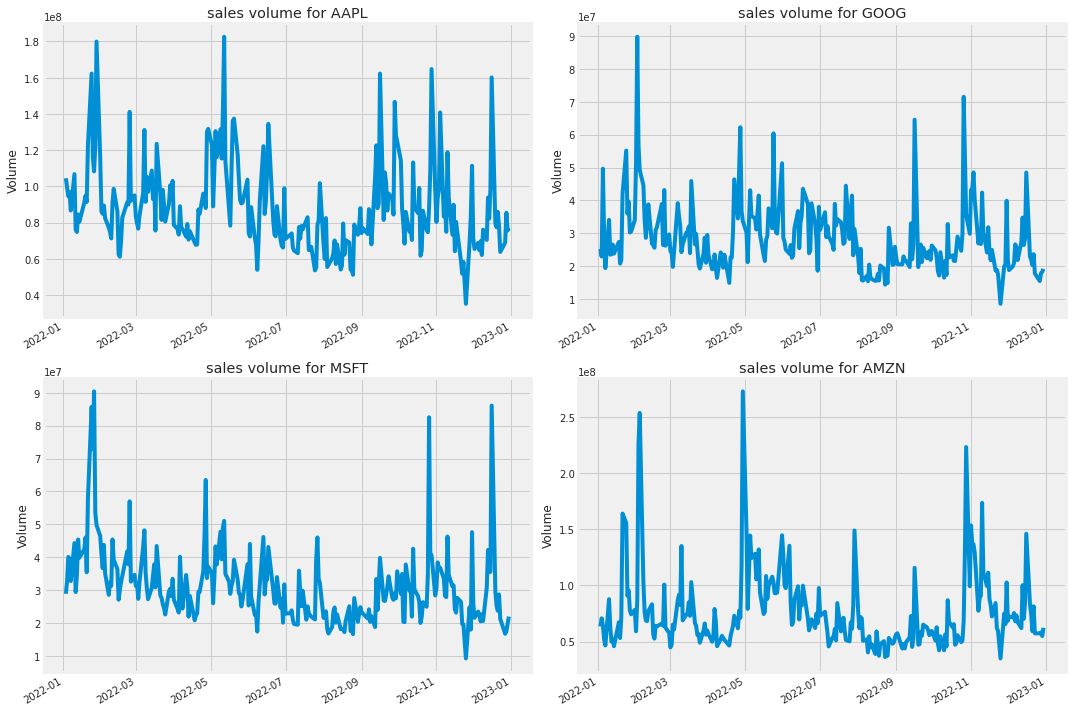

In [11]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25,bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(2,2,i)
  company['Volume'].plot()
  plt.xlabel(None)
  plt.ylabel('Volume')
  plt.title(f'sales volume for {tech_list[i-1]}')

plt.tight_layout()  

# 이동평균

### 이평선(10,20,50)

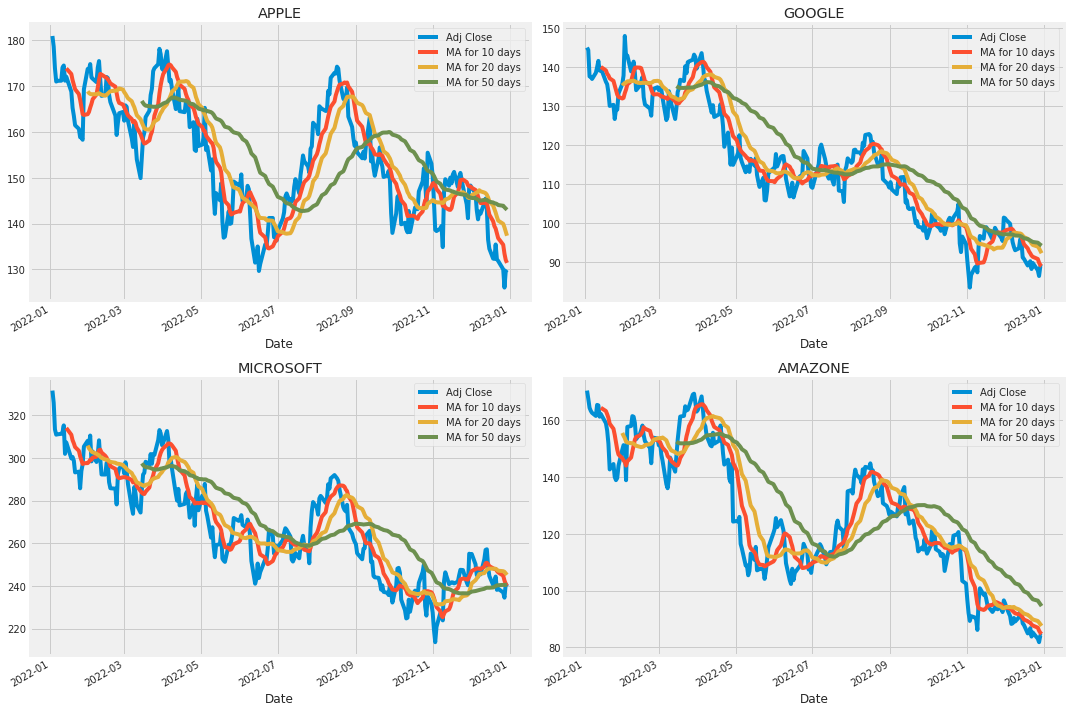

In [12]:
ma_day = [10,20,50]

for ma in ma_day:
  for company in company_list:
    column_name = f"MA for {ma} days"
    company[column_name] = company['Adj Close'].rolling(ma).mean() # rolling.mean 이동평균 구하는 함수 

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days','MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')
GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days','MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')
MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days','MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')
AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days','MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZONE')

fig.tight_layout()

# 하루 평균 수익률

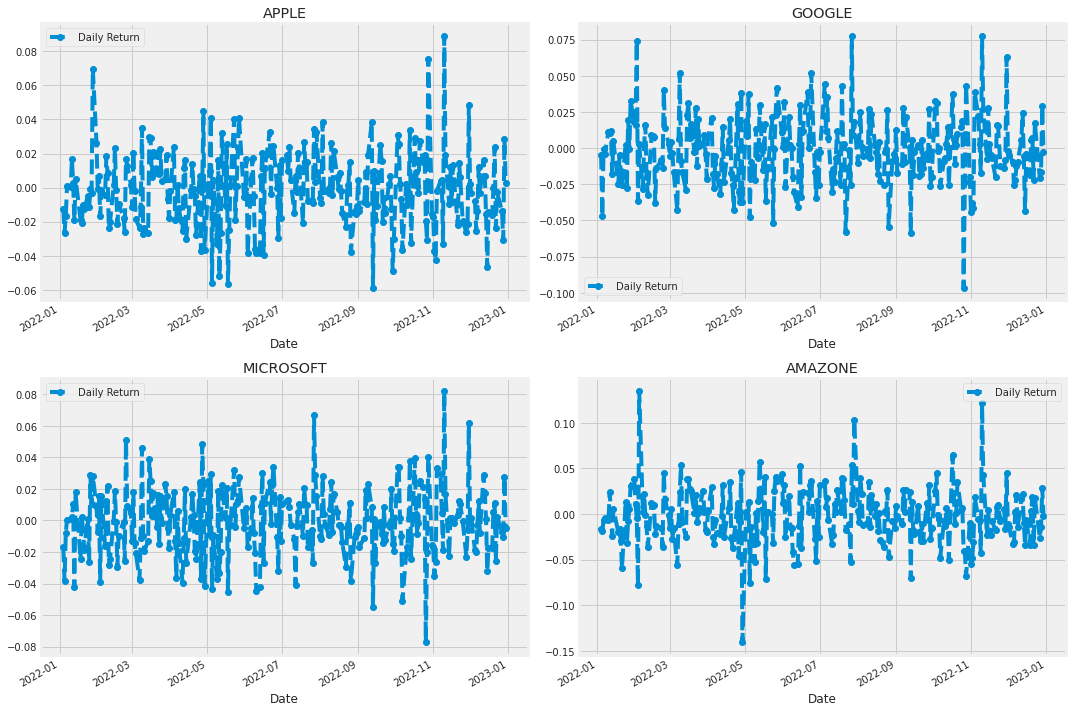

In [13]:
for company in company_list:
  company['Daily Return'] = company['Adj Close'].pct_change() # 수익률 = (매도가격-매수가격)/매수가격 [종가].pct_change() 하면 쉽게 수익률 구할 수 있음

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZONE')

fig.tight_layout()


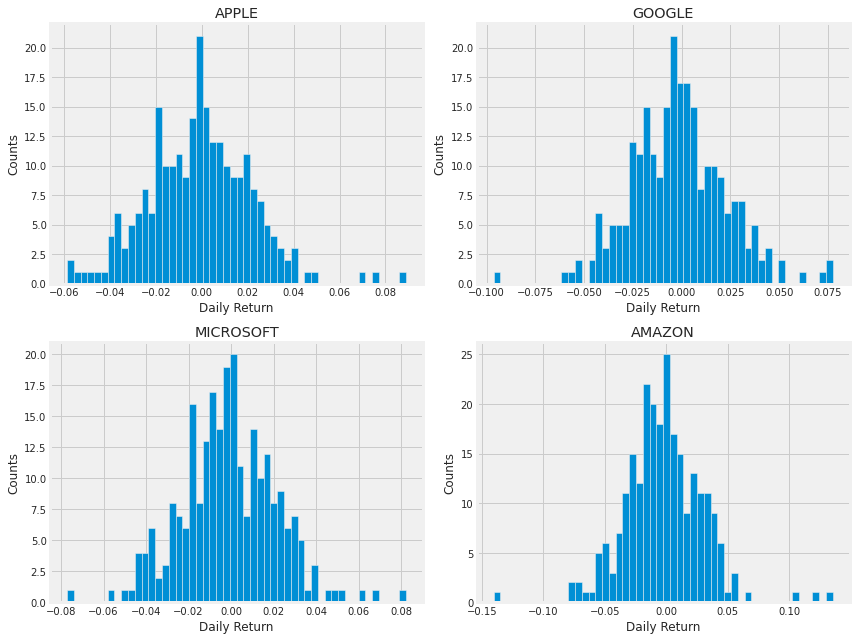

In [14]:
plt.figure(figsize=(12,9))

for i, company in enumerate(company_list,1):
  plt.subplot(2,2,i)
  company['Daily Return'].hist(bins=50)
  plt.xlabel('Daily Return')
  plt.ylabel('Counts')
  plt.title(f"{company_name[i-1]}")

plt.tight_layout()  

# (종가기준) 상관관계

In [15]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close'] # 23년1월1일 기준 이렇게 불러오면 TypeError: string indices must be integers 오류가 뜸 스택오버플로우 검색 결과 yfinace 자체 문제라고 함 위에 인스톨 언인스톨 하면 됨
# 테크리스트(애플 마이크로소프트 아마존 구글), 야후에서 불러오기 스타트(전체) 엔드(전체) 
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change() #closing_df의 일일수익률 pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2022-01-03,NaN,NaN,NaN,NaN
2022-01-04,-0.012692,-0.004536,-0.017147,-0.016916
2022-01-05,-0.026600,-0.046830,-0.038388,-0.018893
2022-01-06,-0.016693,-0.000745,-0.007902,-0.006711
2022-01-07,0.000988,-0.003973,0.000510,-0.004288


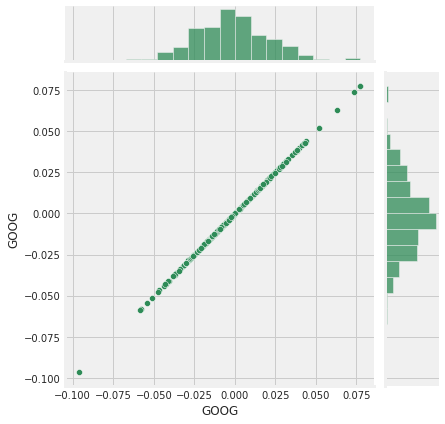

In [16]:
# 예시 구글이랑 구글을 비교하면 당연히 100% 선형관계를 보여주겠죠?
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets, kind='scatter',color='seagreen')

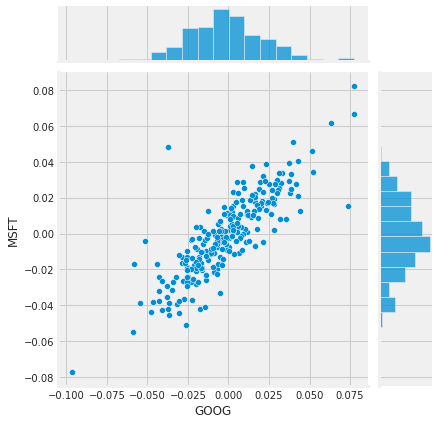

In [17]:
#양의 상관관계를 띄고 있으면 선형 관계가 발생한다는 걸 알 수 있다. 

sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter')

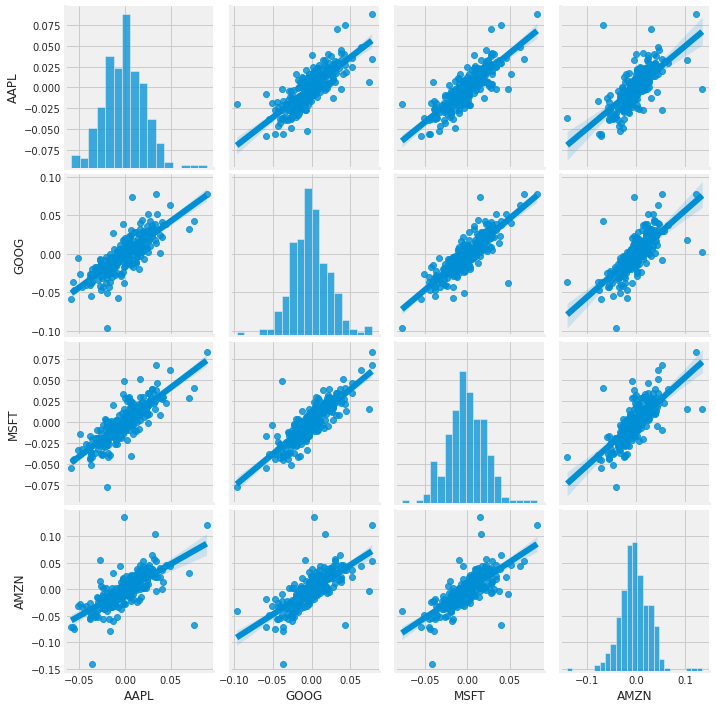

In [18]:
# #pairplot을 이용하면 전체 비교가 가능
sns.pairplot(tech_rets, kind='reg') 

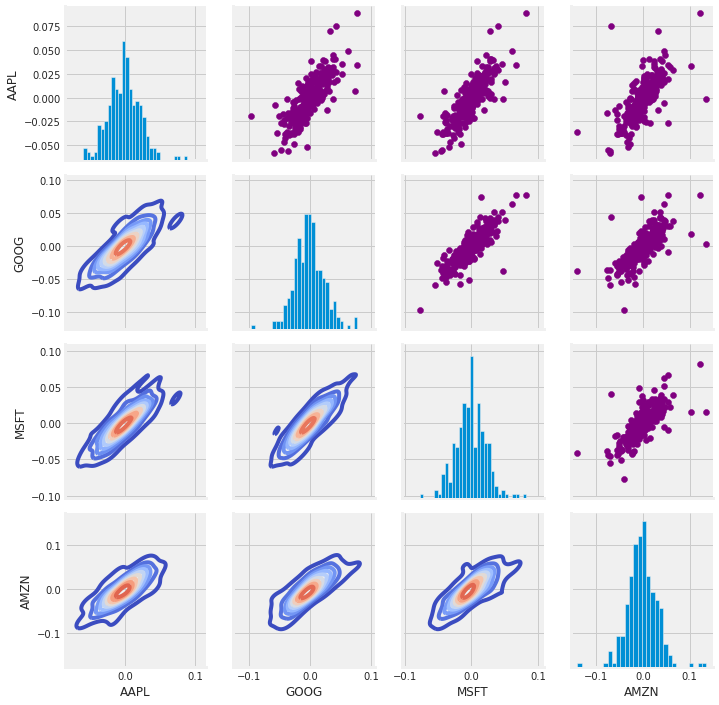

In [19]:
# 일일수익률 상관관계

return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple') #map_upper로 우측 삼각형 구간 지정가능 스캐터로 지정

return_fig.map_lower(sns.kdeplot, cmap='coolwarm') #map_lower로 왼쪽 아래 삼각형 구간 지정 가능 kdeplot

return_fig.map_diag(plt.hist, bins=30) # 나머지는 히스토그램


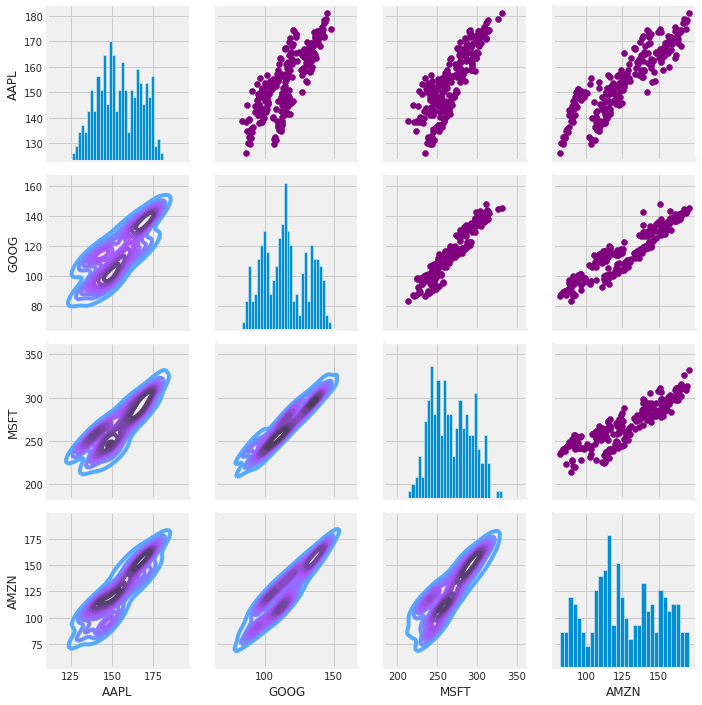

In [20]:
# 종가 상관관꼐
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'corr of stock close price ')

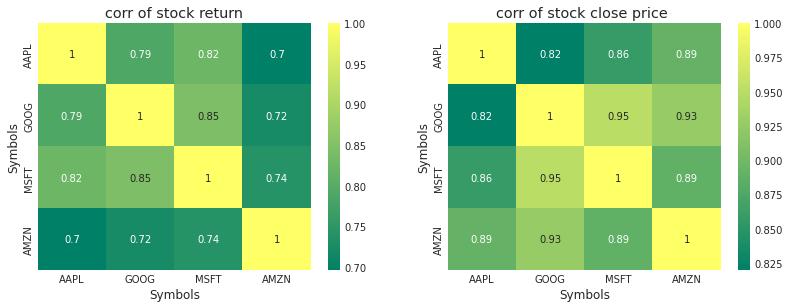

In [21]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('corr of stock return')

plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('corr of stock close price ')

# 일일수익률 부문에서 애플-마소, 구글-마소 는 0.8이상의 상관관계
# 종가 부문에선 아마존-구글 마소-구글은 0.9이상의 상관관계

# 다 0.7이상의 양의상관관계를 보인다. (올라가면 같이올라가고 내려가면 같이 내려간다는 뜻)

# 투자 위험도

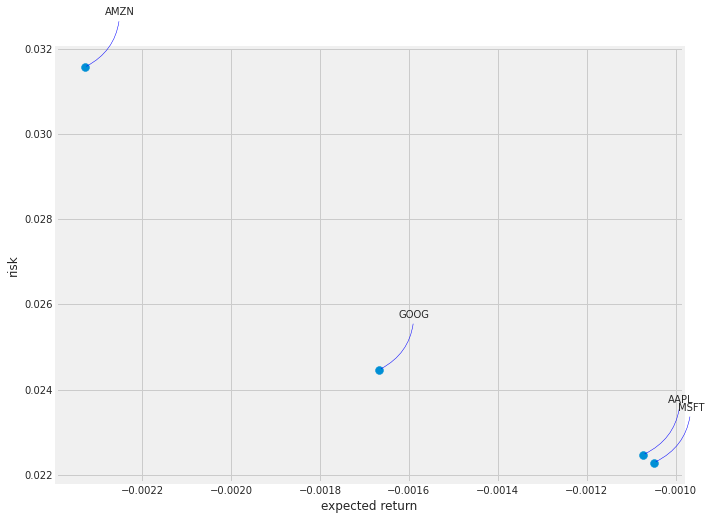

In [22]:
#예상수익률과 일일수익률의 표준편차로 위험률 구하기
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('expected return')
plt.ylabel('risk')

for label, x,y in zip(rets.columns, rets.mean(),rets.std()):
  plt.annotate(label, xy=(x,y), xytext=(50,50), textcoords='offset points', ha='right',va='bottom',
               arrowprops=dict(arrowstyle='-', color='blue',connectionstyle='arc3,rad=-0.3')
               )

# 애플 종가 예측하기

In [23]:
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.519278
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.586559
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.726293
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.859333
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.838934
...,...,...,...,...,...,...
2022-12-23,132.419998,129.639999,130.919998,131.860001,63814900.0,131.860001
2022-12-27,131.410004,128.720001,131.380005,130.029999,69007800.0,130.029999
2022-12-28,131.029999,125.870003,129.669998,126.040001,85438400.0,126.040001


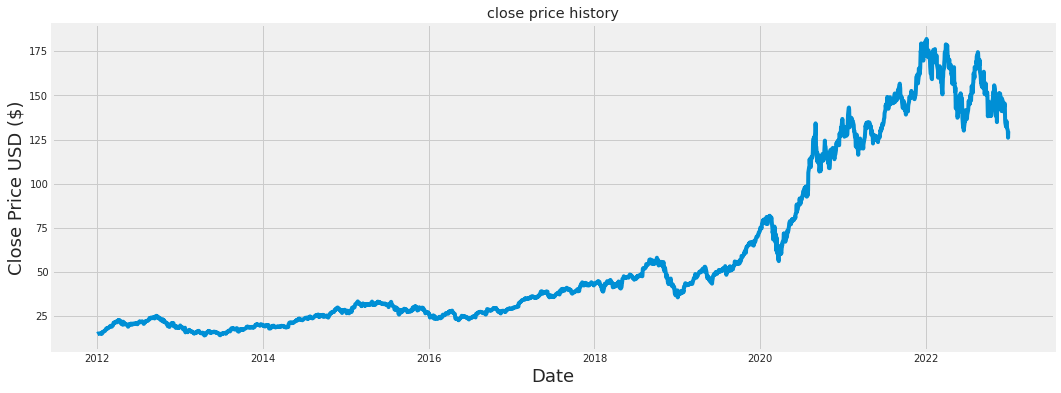

In [24]:
# 애플 종가 시각화 
plt.figure(figsize=(16,6))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [25]:
data = df.filter(['Close'])
data

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786
...,...
2022-12-23,131.860001
2022-12-27,130.029999
2022-12-28,126.040001


In [117]:
data.tail(138)

,Close
Date,
2022-06-15,135.429993
2022-06-16,130.059998
2022-06-17,131.559998
2022-06-21,135.869995
2022-06-22,135.350006
...,...
2022-12-23,131.860001
2022-12-27,130.029999
2022-12-28,126.040001


In [26]:
dataset = data.values # data의 밸류값만 close 값 (주식 가격)
training_data_len = int(np.ceil(len(dataset) * .95)) #np.ceil 올림값
# 밸류값의 길이 올림 * 0.95  

In [30]:
2768 * .95

2629.6

In [95]:
training_data_len

2630

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.66696916],
       [0.68821126],
       [0.69011526]])

In [36]:
train_data = scaled_data[0:int(training_data_len), :] #0부터 2630행 까지 / 모든열(사실상1렬)
x_train = []
y_train = []

for i in range(60, len(train_data)): # 60부터 2630까지 
    x_train.append(train_data[i-60:i, 0]) #행 2570:2630 , 열 0
    y_train.append(train_data[i, 0]) # 2630,0
    if i<= 61: # 60이랑 61의 x_train y_train 만 출력 x_train 60개 다음에 y_train [0.04660893460974819] x 60개 2번 y [0.04660893460974819, 0.04441800167645807] 2개
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],  x_train.shape[1],1))

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [61]:
scaled_data[0:int(training_data_len), :].shape

(2630, 1)

In [38]:
train_data[i-60:i, 0] # 60개

array([0.89271849, 0.90104878, 0.92151737, 0.9297881 , 0.95275575,
       0.95662332, 0.9618595 , 0.98185206, 0.97477135, 0.9559688 ,
       0.95418373, 0.97875795, 0.95864635, 0.93942734, 0.94127188,
       0.92907401, 0.90325031, 0.91461515, 0.93091855, 0.90051319,
       0.89920424, 0.91306805, 0.91205653, 0.90723691, 0.8796876 ,
       0.88617336, 0.84999633, 0.84862781, 0.89069545, 0.85505391,
       0.85689854, 0.86594273, 0.90485688, 0.84981783, 0.85285238,
       0.8217925 , 0.83637039, 0.78870958, 0.76526591, 0.79233919,
       0.78299738, 0.80501307, 0.75491267, 0.73426559, 0.73569357,
       0.76853852, 0.75217556, 0.75312761, 0.77252512, 0.80739311,
       0.80263295, 0.80185949, 0.81673491, 0.78204542, 0.78656752,
       0.80185949, 0.79739687, 0.76574193, 0.73295654, 0.70171816])

In [43]:
x_train.shape[0]

2570

In [46]:
x_train.shape[1],1

(60, 1)

In [47]:
x_train.shape[0],  x_train.shape[1],1

(2570, 60, 1)

In [39]:
train_data[i, 0]

0.7069542481111418

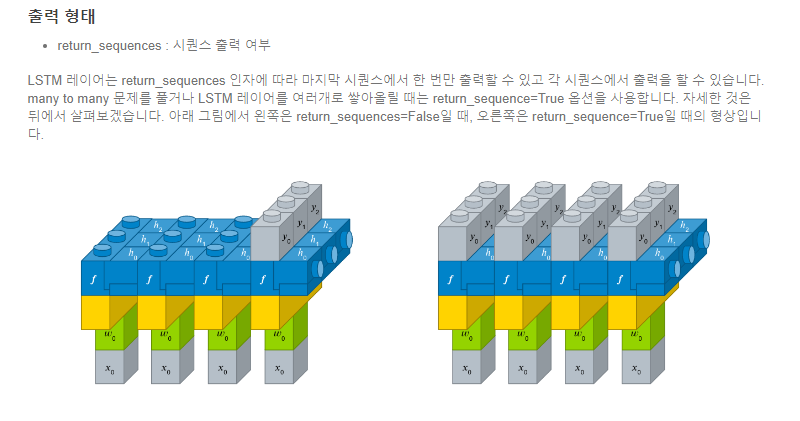

In [49]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#모델링
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1))) # 메모리셀의 개수 128
model.add(LSTM(64, return_sequences=False)) # 64
model.add(Dense(25)) #출력뉴런의수 25
model.add(Dense(1))

# 모델컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
model.fit(x_train,y_train, batch_size=1, epochs=1)


# return_sequences 모든 timestep에 hidden state를 return 할지 여부 
#LSTM은 대부분의 문제에 대해서 RNN보다 좋다! Long Short Term Memory의 줄임말로 주로 시계열 처리
# Dense Layer의 각 뉴런이 이전 계층의 모든 뉴런으로부터 입력을 받게 됩니다. (거의 맨 마지막 레이어)
#Dense Layer는 간단히 말해서 추출된 정보들을 하나의 레이어로 모으고, 우리가 원하는 차원으로 축소시켜서 표현하기 위한 레이어입니다. 


2570/2570 [==============================] - 159s 60ms/step - loss: 0.0016


In [97]:
scaled_data.shape

(2768, 1)

In [100]:
2768 - 2570

198

In [99]:
training_data_len - 60

2570

In [103]:
dataset.shape

(2768, 1)

In [ ]:
dataset[training_data_len:, :] # 총 2768 행중에 2630부터 끝까지 

In [104]:
2768-2630

138

In [109]:
dataset[training_data_len:, :].shape

(138, 1)

In [50]:

test_data = scaled_data[training_data_len - 60: , :] #2570부터 끝까지 198
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


x_test = np.array(x_test)

x_test =np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # inverse_transform 스케일링 된 결과를 원상복귀

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 2s 39ms/step


6.431336510197586

In [56]:
test_data[i-60:i, 0]

array([0.78811453, 0.78234286, 0.75056899, 0.75253255, 0.7439643 ,
       0.74015619, 0.76782453, 0.74039425, 0.76437342, 0.77234662,
       0.77300114, 0.77020456, 0.79329124, 0.80626256, 0.82345854,
       0.8056676 , 0.77859432, 0.84368916, 0.82940871, 0.81340274,
       0.77996283, 0.74336934, 0.74039425, 0.7436073 , 0.74705841,
       0.71950911, 0.79091112, 0.8077501 , 0.79930087, 0.80977314,
       0.80233543, 0.8138193 , 0.81721085, 0.7976943 , 0.81060616,
       0.81590189, 0.79828936, 0.77514321, 0.75699518, 0.79781333,
       0.79947937, 0.79650429, 0.78948313, 0.7673485 , 0.75562667,
       0.7658014 , 0.76288588, 0.77674978, 0.78258092, 0.76913357,
       0.72920791, 0.71736704, 0.70463369, 0.70421722, 0.72296021,
       0.70380067, 0.70159913, 0.69071032, 0.66696916, 0.68821126])

In [76]:
scaled_data[training_data_len: , :].shape

(138, 1)

In [78]:
scaled_data[training_data_len - 60: , :].shape

(198, 1)

In [81]:
dataset[training_data_len:, :].shape

# 138부터 끝까지가 2022년6월15일부터 12월31일까지임 

(138, 1)

In [82]:
x_test.shape[0]

138

In [83]:
 x_test.shape[1],1

(60, 1)

<ipython-input-84-c3e74ae2c8a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


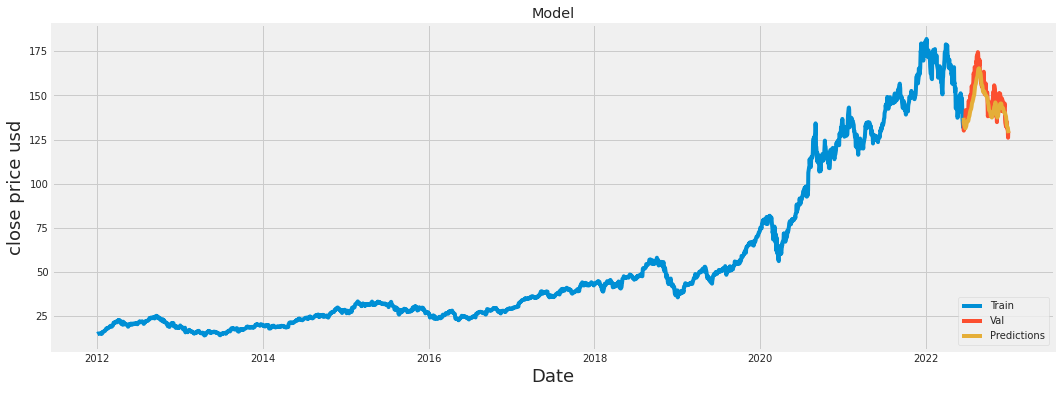

In [84]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price usd',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [90]:
data[:training_data_len].shape

(2630, 1)

In [89]:
data[training_data_len:].shape

(138, 1)

In [85]:
valid

,Close,Predictions
Date,,
2022-06-15,135.429993,137.341949
2022-06-16,130.059998,135.580872
2022-06-17,131.559998,133.724365
2022-06-21,135.869995,132.232407
2022-06-22,135.350006,131.569626
...,...,...
2022-12-23,131.860001,132.596542
2022-12-27,130.029999,131.686981
2022-12-28,126.040001,130.759079


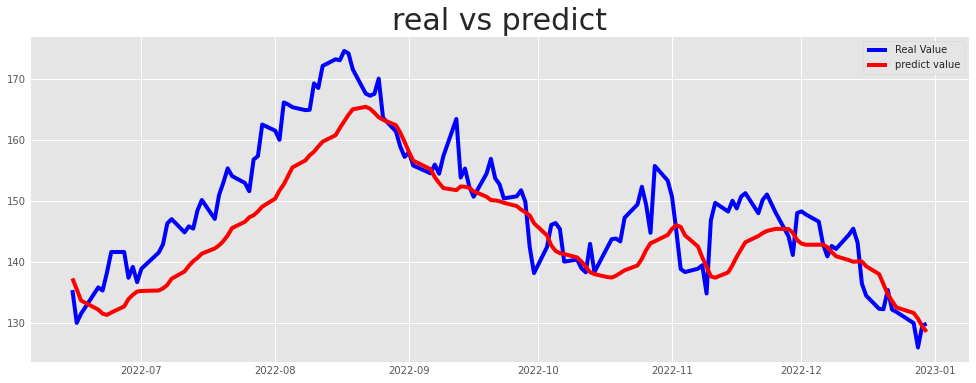

In [119]:
plt.style.use("ggplot")
plt.figure(figsize=(15,6))
plt.plot(valid[0:]['Close'], color = "b", label="Real Value") # 진짜 값
plt.plot(valid[0:]['Predictions'], color = "r", label ="predict value") # 예측 값 
plt.legend()
plt.title("real vs predict", fontsize=30)
plt.show()